In [1]:
import torch, torchvision
import torchvision.transforms.functional as fn
torch.manual_seed(0)

import os
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
#Update os
path = "/home/kishen/documents/python_projects/dogs_v_cats/"
os.chdir(path)
from src.dataset import ImageDataset

Preprocessing

In [3]:
#Create labels: cats=0, dogs=1
labels = np.zeros(25_000)
labels[12_500:] =  1

In [4]:
#create augmentations for ImageDataset
path = "/home/kishen/documents/python_projects/dogs_v_cats/"
os.chdir(path)
from src.dataset import ImageDataset

#Calculated values for entire train/
mean = torch.tensor([124.5185, 116.0429, 106.3195], dtype=torch.float64)
std =  torch.tensor([58.0110, 56.8624, 56.9116], dtype=torch.float64)

#Standardize and zero center data
transformations = torch.nn.Sequential(
        torchvision.transforms.Resize((128,128)),
        torchvision.transforms.Normalize(mean= mean, std=std)

)

#Build training dataset
training_data = ImageDataset(image_paths= path + "data/train/",
                            targets=labels,
                            augmentations=transformations)




In [5]:
training_data.__getitem__(5)['target'] == torch.tensor(0.1)

tensor(False)

In [6]:
# #calcualte mean and std from trainig dataset
# from src.dataset import calculate_img_mean, calculate_img_std

# mean = calculate_img_mean(training_data)
# std = calculate_img_std(training_data)

In [7]:
#create dataloader for training data
from torch.utils.data import DataLoader

loader_params = {"batch_size": 64,
                 "shuffle": True,
                 "num_workers": 16}
                 
train_loader = DataLoader(training_data, **loader_params)

**Training - BaseConvNet**

In [8]:
len(train_loader)

391

In [9]:
#init model and optimizer
from src.models import BaseConvNet, train, accuracy

model = BaseConvNet()

#check that cuda is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

#set train params
train_params = {'model': model, 
                'train_set':training_data,
                'loader': train_loader, 
                'epochs': 10, 
                'criterion': torch.nn.BCEWithLogitsLoss(),
                'optimizer': torch.optim.SGD(model.parameters(), 
                                            lr= 1e-3, 
                                            momentum=0.9,
                                            #weight_decay = .2
                                            )}



cuda


In [10]:
epochs = 10
model = BaseConvNet()
model.to(device)
optimizer= torch.optim.Adam(model.parameters(), 
                                            lr= 1e-3, 
                                            )
criterion= torch.nn.BCEWithLogitsLoss()
epoch_loss = [0] * epochs
epoch_acc = [0] * epochs

for epoch in range(epochs):
    running_loss = 0.00
    correct = 0.00

    for i, data in enumerate(train_loader):
        #move data to gpu
        inputs, labels = data['image'], data['target']
        #print(inputs)
       
        inputs, labels = inputs.to(device), labels.float().to(device)
        #zero gradients
        optimizer.zero_grad() 
        #model computations
        preds = model(inputs.type(torch.cuda.FloatTensor))
        
        loss = criterion(preds, labels.unsqueeze(1))
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        correct += accuracy(preds, labels)
        
        
    print(correct)
    
    epoch_loss[epoch] = (running_loss / i) #i is the num_batches in epoch
    epoch_acc[epoch] = 100 * correct / 25_000
    print("Loss for Epoch %s: %s\nAccuracy: %s" % (str(epoch + 1), str(round(epoch_loss[epoch],3)),str(epoch_acc[epoch])))

print("Training complete!")

12455.36875
Loss for Epoch 1: 26.872
Accuracy: 49.821475
12502.45625
Loss for Epoch 2: 0.691
Accuracy: 50.009825
12510.875
Loss for Epoch 3: 0.714
Accuracy: 50.0435
12504.46875
Loss for Epoch 4: 0.692
Accuracy: 50.017875
12502.5
Loss for Epoch 5: 0.695
Accuracy: 50.01
12500.0
Loss for Epoch 6: 0.695
Accuracy: 50.0
12500.0
Loss for Epoch 7: 0.695
Accuracy: 50.0
12500.0
Loss for Epoch 8: 0.695
Accuracy: 50.0
12500.0
Loss for Epoch 9: 0.695
Accuracy: 50.0
12500.0
Loss for Epoch 10: 0.695
Accuracy: 50.0
Training complete!


In [11]:
# loss, acc = train(**train_params)
# #https://www.binarystudy.com/2022/04/how-to-normalize-image-dataset-inpytorch.html

NameError: name 'acc' is not defined

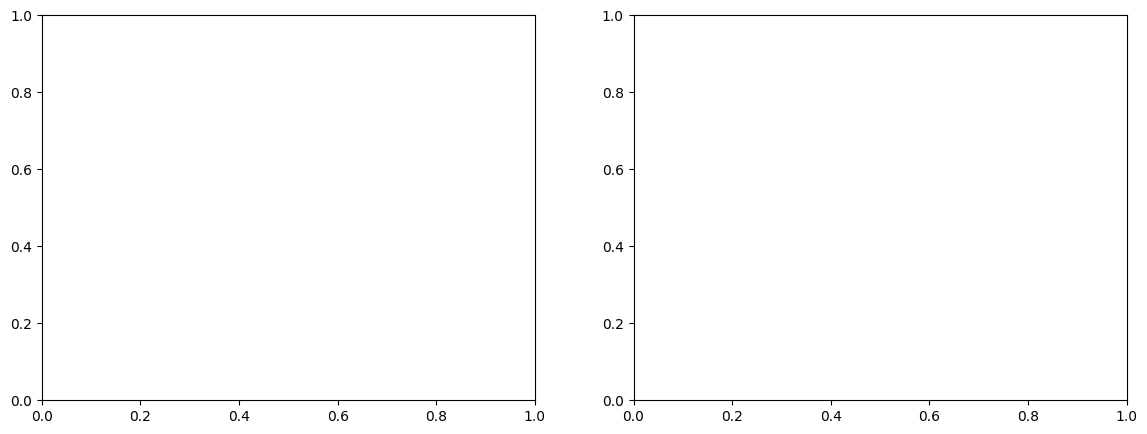

In [12]:
#plot loss and acc
from src.models import plot_loss, plot_acc

f, ax = plt.subplots(1, 2,figsize = (14,5))

plot_acc(acc, ax[0])
plot_loss(loss, ax[1])

In [ ]:
# torch.save(model.state_dict(), "/home/kishen/documents/python_projects/dogs_v_cats/models/base_conv_model")